Лабораторна робота №7
групи МІТ-31
Квартюк Олексій

Мета:
Розробка та порівняння моделей глибокого навчання для мультикласової класифікації трьох класів зображень їжі, а також використання transfer learning для покращення результатів.

Дані:
Набір даних: 10_food_classes_all_data.zip.

Завдання:

1) Вибір Класів:

Виберіть три класи з набору даних для класифікації на основі методики вибору з практичної роботи.

2) Попередня Обробка:

Завантажте та розпакуйте набір даних.
Поділіть дані на тренувальний, валідаційний та тестовий набори.
Виконайте необхідну попередню обробку даних.

3) Розробка та Тренування Моделей:

Створіть три різні моделі глибокого навчання для класифікації обраних класів. Наприклад, ви можете змінювати архітектуру, кількість шарів, активаційні функції тощо.
Тренуйте кожну модель на тренувальному наборі даних та валідуйте їх на валідаційному наборі.

4) Оцінка Моделей:

Оцініть кожну модель на тестовому наборі даних.
Запишіть та порівняйте результати точності та часу тренування для кожної моделі.

5) Додаткове Завдання (на високу оцінку):

Використайте transfer learning з використанням EfficientNet з TensorFlow Hub для класифікації тих самих трьох класів.
Порівняйте результати цієї моделі з попередніми трьома за точністю та часом тренування.
Додаткові Вимоги:
Використовуйте TensorFlow та інші відповідні бібліотеки для реалізації проекту.
Забезпечте чистоту коду та його належне коментування.

In [ ]:
import zipfile
import os
from google.colab import drive
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

!cp /content/gdrive/'My Drive'/10_food_classes_all_data/10_food_classes_all_data.zip .

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
main_dir="10_food_classes_all_data"

food_list = os.listdir("10_food_classes_all_data/train")
food_list.sort()
print(food_list)

Mounted at /content/gdrive
['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [ ]:
for i in food_list:
  if i == 'grilled_salmon' or i == 'hamburger' or i == 'ice_cream':
    print(i)
  else:
    folder_path = os.path.join("/content/10_food_classes_all_data/train", i)
    folder_path_2 = os.path.join("/content/10_food_classes_all_data/test", i)
    !rm -r $folder_path
    !rm -r $folder_path_2
food_list = os.listdir("10_food_classes_all_data/train")
print(food_list, " - train")
food_list_2 = os.listdir("10_food_classes_all_data/test")
print(food_list_2, " - test")

grilled_salmon
hamburger
ice_cream
['ice_cream', 'grilled_salmon', 'hamburger']  - train
['ice_cream', 'grilled_salmon', 'hamburger']  - test


In [ ]:
tf.random.set_seed(42)
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/10
71/71 [==============================] - 23s 156ms/step - loss: 1.0603 - accuracy: 0.4276 - val_loss: 0.9308 - val_accuracy: 0.5640
Epoch 2/10
71/71 [==============================] - 9s 130ms/step - loss: 0.8553 - accuracy: 0.6222 - val_loss: 0.8884 - val_accuracy: 0.5947
Epoch 3/10
71/71 [==============================] - 10s 135ms/step - loss: 0.7343 - accuracy: 0.6858 - val_loss: 0.9294 - val_accuracy: 0.5787
Epoch 4/10
71/71 [==============================] - 10s 148ms/step - loss: 0.5320 - accuracy: 0.7938 - val_loss: 1.0162 - val_accuracy: 0.5840
Epoch 5/10
71/71 [==============================] - 10s 142ms/step - loss: 0.3045 - accuracy: 0.8916 - val_loss: 1.2894 - val_accuracy: 0.5627
Epoch 6/10
71/71 [==============================] - 12s 174ms/step - loss: 0.1667 - accuracy: 0.9467 - val_loss: 1.6400 - val_accuracy: 0.5920
Epoch 7/10
71/71 [==============================] - 10s 147m

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

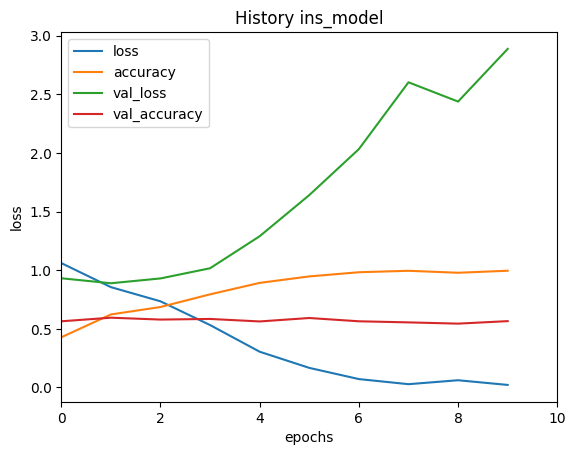

In [ ]:
pd.DataFrame(history_1.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))

Epoch 1/10
71/71 [==============================] - 12s 149ms/step - loss: 1.3200 - accuracy: 0.4680 - val_loss: 1.0072 - val_accuracy: 0.4947
Epoch 2/10
71/71 [==============================] - 9s 121ms/step - loss: 0.8565 - accuracy: 0.6004 - val_loss: 0.8542 - val_accuracy: 0.6107
Epoch 3/10
71/71 [==============================] - 11s 152ms/step - loss: 0.6158 - accuracy: 0.7529 - val_loss: 0.8603 - val_accuracy: 0.6400
Epoch 4/10
71/71 [==============================] - 9s 129ms/step - loss: 0.2948 - accuracy: 0.8933 - val_loss: 1.0223 - val_accuracy: 0.6093


<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

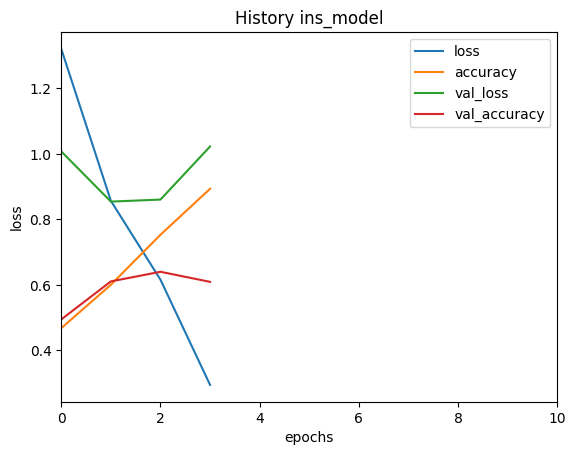

In [ ]:
model_new_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the new model
model_new_2.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy'])

# Fit the new model
history_new = model_new_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=2,
                            restore_best_weights=True
                        )
                    ])




pd.DataFrame(history_new.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))

Epoch 1/10
71/71 [==============================] - 19s 192ms/step - loss: 0.3866 - accuracy: 0.8831 - val_loss: 0.1538 - val_accuracy: 0.9627
Epoch 2/10
71/71 [==============================] - 9s 130ms/step - loss: 0.1550 - accuracy: 0.9587 - val_loss: 0.1133 - val_accuracy: 0.9667
Epoch 3/10
71/71 [==============================] - 11s 156ms/step - loss: 0.1184 - accuracy: 0.9658 - val_loss: 0.1006 - val_accuracy: 0.9667
Epoch 4/10
71/71 [==============================] - 10s 144ms/step - loss: 0.1000 - accuracy: 0.9729 - val_loss: 0.0887 - val_accuracy: 0.9720
Epoch 5/10
71/71 [==============================] - 10s 141ms/step - loss: 0.0862 - accuracy: 0.9769 - val_loss: 0.0846 - val_accuracy: 0.9733
Epoch 6/10
71/71 [==============================] - 14s 195ms/step - loss: 0.0746 - accuracy: 0.9804 - val_loss: 0.0802 - val_accuracy: 0.9747
Epoch 7/10
71/71 [==============================] - 10s 140ms/step - loss: 0.0663 - accuracy: 0.9844 - val_loss: 0.0775 - val_accuracy: 0.9747


<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

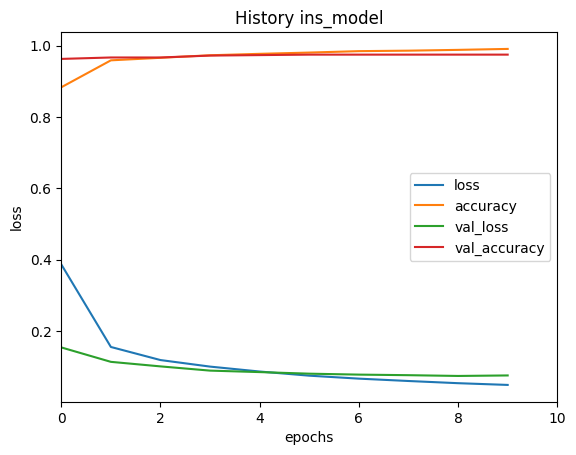

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Шлях до завантаженого модулю EfficientNet
module_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1" # Змініть за потребою

# Завантаження моделі EfficientNet
feature_extractor = hub.KerasLayer(module_url, input_shape=(224, 224, 3))

# Замороження параметрів
feature_extractor.trainable = False

# Створення моделі
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(3, activation='softmax')  # 3 класи для класифікації
])

# Компіляція моделі
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Тренування моделі
history_g = model.fit(
    train_data,
    epochs=10,
    validation_data=valid_data
)

pd.DataFrame(history_g.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))